# Testing the robustness of $T_{MRCA}$ estimates on simulated data

In [1]:
library(tidyverse)
library(magrittr)
library(here)
library(bdkn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /Users/martin_petr/projects/ychr

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%



In [2]:
devtools::load_all(".")

Loading ychr


In [73]:
calculate_tmrca <- function(gt) {
    samples <- read_siminfo(gt)

    tAfrRef <- calculate_tAfrRef(gt, samples) %>% select(afr, emh, starts_with("tmrca"), mut_rate, everything())
    tArchRef <- calculate_tArchRef(gt, samples, tAfrRef)

    tArchRef %>%
        summarise_at(vars(starts_with("tmrca"), mut_rate), mean)
}

In [14]:
df <- list.files(here("data/coalsims"), ".tsv$", full.names = TRUE) %>%
    map_dfr(function(f) {
        gt <- read_simgt(f)
        map_dfr(seq(0, 0.2, 0.01), function(e) {
            gt %>%
            add_errors(e, "arch0") %>%
            calculate_tmrca %>%
                mutate(error_rate = e,
                       true_split = split_time <- basename(f) %>% str_replace("archsplit(\\d+)_.*.tsv", "\\1") %>% as.integer,
                       rep = basename(f) %>% str_replace("archsplit\\d+_rep(\\d+).tsv", "\\1") %>% as.integer)
        })
    })

In [17]:
df %>% filter(true_split == 300000)

tmrca_arch,tmrca_ad,tmrca_f,tmrca_avg,mut_rate,error_rate,true_split,rep
647055.1,299971.5,277461.9,288716.7,5.469014e-11,0,300000,1
157990.6,149444.4,159575.0,154509.7,1.045100e-10,0,300000,10
836691.8,789040.9,849391.3,819216.1,4.279866e-11,0,300000,2
2890126.5,2969429.4,2813429.5,2891429.4,-3.259509e-10,0,300000,3
128577.0,150663.8,140310.7,145487.2,3.130513e-11,0,300000,4
1749416.2,1781793.8,1717038.8,1749416.2,1.460925e-11,0,300000,5
993286.4,666456.8,743372.8,704914.8,4.361969e-11,0,300000,6
182815.5,-128943.2,-154125.1,-141534.1,6.496426e-11,0,300000,7
322835.1,246484.5,280528.5,263506.5,4.446546e-11,0,300000,8
455605.2,347967.1,336018.0,341992.6,4.508950e-11,0,300000,9


In [15]:
df %>%
group_by(true_split, error_rate) %>%
summarise_all(mean) %>%arrange(desc(true_split)) %>% head

true_split,error_rate,tmrca_arch,tmrca_ad,tmrca_f,tmrca_avg,mut_rate,rep
575000,0,310291,159016,146648.8,152832.4,7.941311e-11,4.0
550000,0,Inf,Inf,Inf,Inf,6.162512e-11,5.5
525000,0,Inf,Inf,Inf,Inf,5.340168e-11,5.5
500000,0,Inf,Inf,Inf,Inf,-3.501480e-11,5.5
475000,0,Inf,Inf,Inf,Inf,2.017008e-11,5.5
450000,0,Inf,Inf,Inf,Inf,1.110035e-10,5.5


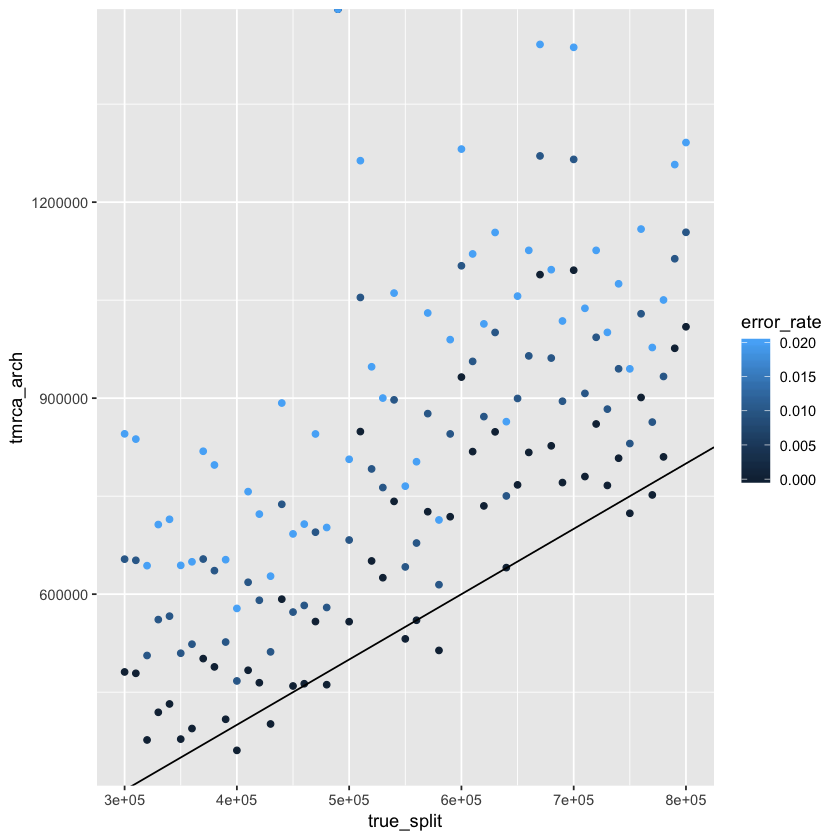

In [38]:
df %>% filter(error_rate < 0.03) %>%
group_by(true_split, error_rate) %>%
summarise_all(mean) %>%
ggplot(aes(true_split, tmrca_arch, color = error_rate)) + geom_point() + geom_abline(slope = 1)

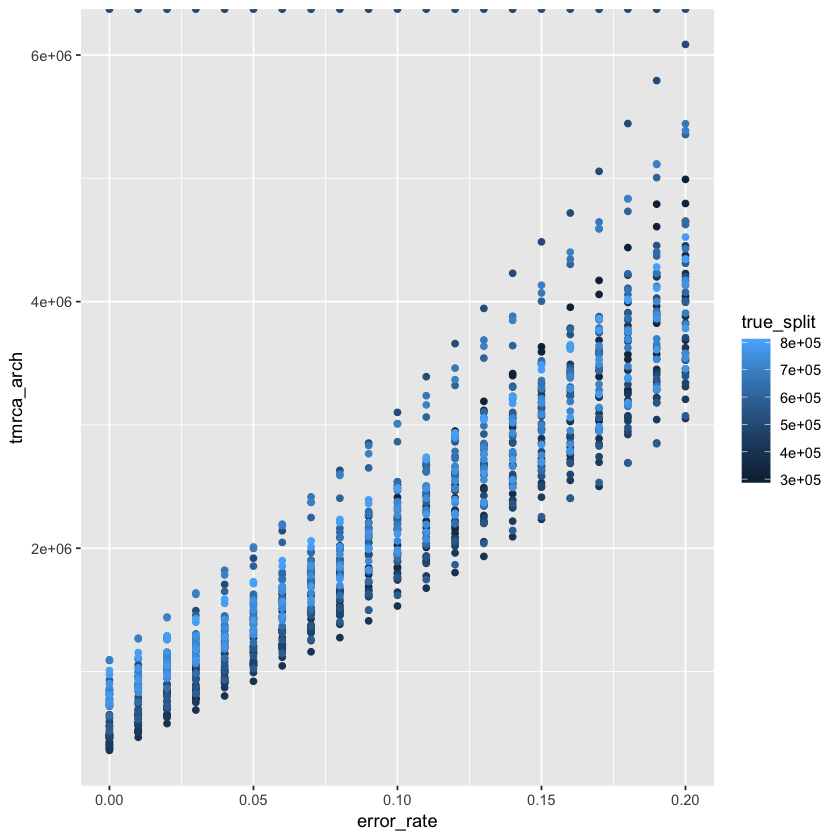

In [28]:
df %>%
group_by(true_split, error_rate) %>%
summarise_all(mean) %>%
ggplot(aes(true_split, tmrca_arch, color = error)) + geom_point()

In [54]:
gt <- read_simgt("../data/coalsims/archsplit600000.tsv")

In [55]:
samples <- read_siminfo(gt)

In [56]:
tAfrRef <- calculate_tAfrRef(gt, samples) %>% select(afr, emh, starts_with("tmrca"), mut_rate, everything())

In [57]:
tAfrRef %>% group_by(afr) %>% summarise_if(is.numeric, mean)

afr,tmrca_ad,tmrca_f,tmrca_avg,mut_rate,a,b,c,d,e,f,total,age,muts_per_year
afr0,280673.1,339807.7,310240.4,3.016095e-11,43,0,0,9.5,0,62,6999484,45000,0.0002111111


In [58]:
tArchRef <- calculate_tArchRef(gt, samples, tAfrRef)

In [59]:
tArchRef %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_ad,tmrca_f,tmrca_avg,a,b,c,d,e,f,total,p
arch0,798028.8,2.556039,3.016095e-11,280673.1,339807.7,310240.4,89,0,0,52.5,62,112,6999484,0.4374758
